iter :  1000


<Figure size 1600x800 with 0 Axes>

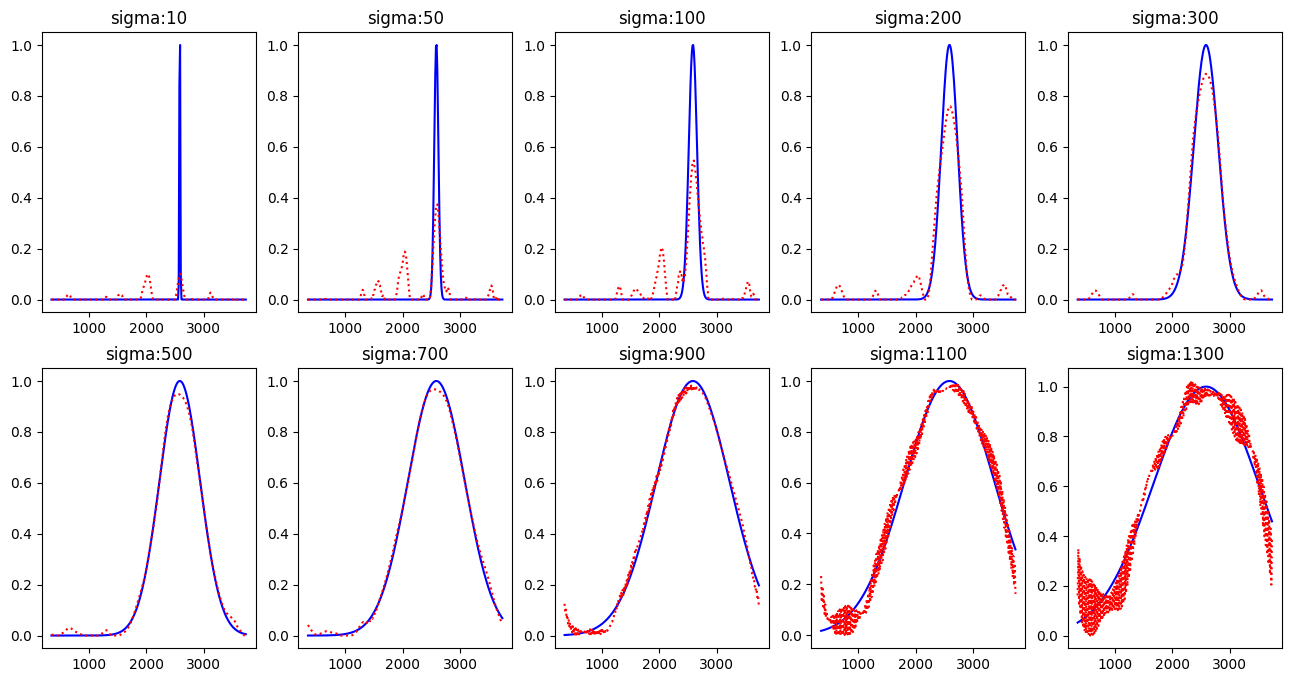

In [58]:

from dataset.SpectralDataset import SpectralDataset
from net.model_ADMM import ADMM
import torch
import matplotlib.pylab as plt
import random

sp ="data/SpectralResponse_9.npy"   


plt.rcParams['figure.figsize'] = (16, 8.0) 
sigs = [10, 50, 100, 200, 300, 500,  700, 900, 1100, 1300]
col = len(sigs)//2
iter = 1000
print("iter : ", iter)
plt.figure()
fig, ax = plt.subplots(2,col)
for i in range(2):
    for j in range(col):
        idx = i * col + j
        random.seed(100)
        dataset = SpectralDataset(sp, train=True, have_noise=False, sig=(sigs[idx],sigs[idx]+1), peak_num=2)
        det, spectral = dataset.__getitem__(1)
        sz = dataset.get_size()
        x = torch.linspace(355,3735,sz[0])

        admm = ADMM(mode="l1_tv", iter = iter, sp_file = sp)
        rex = admm.forward(spectral)
        ax[i][j].plot(x, spectral,'b', x, rex,'r:') 
        ax[i][j].set_title("sigma:{}".format(sigs[idx]))  
plt.show()
